# Exercise 1 - week 4

For this exercise, we are going to experiment with __Principal Component Analysis(PCA)__ for dimensionreduction and visualization. In this exercise we will be using "Handwritten Digits" from scikit-learn, which are scanned pictures of numbers written from 0 to 9





## Qa) Load the data and make a short data analysis(plot som examples)



In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The digits dataset
digits = datasets.load_digits()
X,y = datasets.load_digits(return_X_y=True)
lenofDig=(len(X))
print("Length of X in digits: ", lenofDig)
#print(digits)
print("\nX ", X)
print("\ny[0:10]: ",y[0:10])
    
# show images of digits
print("\n\nPrinting image of the indexes 0 through 10: ")
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray_r)
    plt.title('Training: %i\n' % label, fontsize = 20)
    
#split data into training and test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)


Length of X in digits:  1797

X  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

y[0:10]:  [0 1 2 3 4 5 6 7 8 9]


Printing image of the indexes 0 through 10: 


#### Notes on the raw data:
X: As seen above we have in the X matix the data contaning the values of each pixel used to drav the image.
y: The result matrix contaning the expected number to be shown on the image, we here prints the indexes from 0 through 10.

As we try to print the image on indexes 0 through 10 in the X matrix, we expect them to be the same as in seen in the result matrix y, and should represent the numbers 0 through 9. This we see to be true.

### PCA on the data:

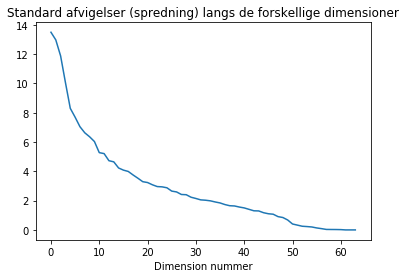

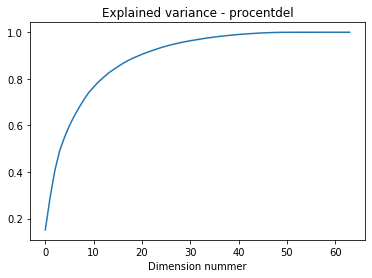

In [2]:
#Fitting PCA
pca = PCA().fit(x_train)

s1 = np.sqrt(pca.explained_variance_) # OBS: Relater til Dmat..
plt.plot(s1)
plt.title('Standard afvigelser (spredning) langs de forskellige dimensioner')
plt.xlabel('Dimension nummer')

#Plotting the explained Varriance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Explained variance - procentdel')
plt.xlabel('Dimension nummer')

functionArray=(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))

To find the optimal dimention for making pca on the data we need to find the dimension corresponding to where the explained varrianse is 95%. This ensures that we have as many componments with a big explained varriance (close to 1) without having to many redundante dimentions.

In [3]:
#Findind the optimal dimention
above95Indexes = np.where(functionArray>0.95)
dimension=above95Indexes[0][0]
print("The dimention corresponding to 95% explained varriance = ",dimension)

The dimention corresponding to 95% explained varriance =  27


Now we can make the PCA fit with a propper number of dimentions:

In [4]:
# PCA fit
pca2 = PCA(n_components=dimension)
pca2.fit(x_train)

# principal componments
pc = pca2.components_

#### Explained varriance:
We now find the Explained varriance for each feature (feature is the same as dimention) and print them below. Explained variance is the proportion of the the varriance in the dataset which lies within the different features.

In [5]:
# Explained varriance:
explainedVarians = pca2.explained_variance_
print('Variance = \n',explainedVarians)

Variance = 
 [182.0671999  168.26576015 141.0198314  101.1039726   68.88231504
  59.22154283  49.64058254  43.95115711  40.42219203  36.39040793
  27.82306742  27.1380777   22.31784467  21.59313942  17.88187085
  16.65760868  15.92490743  14.06608553  12.44353359  10.84137941
  10.45768334   9.49005364   8.75427136   8.64293426   8.2727919
   7.01871991   6.72226816]


#### Standart deviation:

Standart deviation is the deviation of the values compared to the mean value of the data. We here get the standart deviation of each of the features.

In [6]:
#Standart deviation
standartDeviation = np.sqrt(explainedVarians)
print("Standart deviation= \n", standartDeviation)

Standart deviation= 
 [13.49322793 12.97172927 11.87517711 10.05504712  8.29953704  7.69555345
  7.04560732  6.62956689  6.35784492  6.03244626  5.27475757  5.20942201
  4.72417661  4.64684188  4.22869612  4.08137338  3.99060239  3.75047804
  3.52753931  3.292625    3.23383415  3.08059307  2.95876179  2.93988678
  2.87624615  2.64928668  2.59273372]


#### Mean value:
The mean value is the mean of all datas in each feature.

In [7]:
# Mean values
mean = pca2.mean_
print('Mean = \n',mean)


Mean = 
 [0.00000000e+00 3.17743133e-01 5.22345954e+00 1.17609503e+01
 1.18700817e+01 5.85300668e+00 1.32887899e+00 1.15070527e-01
 5.19673348e-03 1.98292502e+00 1.03763920e+01 1.20890869e+01
 1.03956941e+01 8.27913883e+00 1.79658500e+00 9.20564217e-02
 1.48478099e-03 2.57980698e+00 9.85449146e+00 7.07795100e+00
 7.12694878e+00 7.84484039e+00 1.74164811e+00 4.67706013e-02
 7.42390497e-04 2.48106904e+00 9.12769117e+00 8.82182628e+00
 9.92650334e+00 7.52412769e+00 2.34075724e+00 1.48478099e-03
 0.00000000e+00 2.38307350e+00 7.64216778e+00 9.03489235e+00
 1.02761693e+01 8.69710468e+00 2.95248701e+00 0.00000000e+00
 9.65107647e-03 1.63622866e+00 6.96881960e+00 7.28136600e+00
 7.74090572e+00 8.22420193e+00 3.38307350e+00 2.96956199e-02
 9.65107647e-03 7.45360059e-01 7.60059391e+00 9.65330364e+00
 9.52264291e+00 8.76466221e+00 3.60207869e+00 1.84112843e-01
 7.42390497e-04 2.99925761e-01 5.58351893e+00 1.20363771e+01
 1.18084633e+01 6.70972532e+00 2.00222717e+00 3.28136600e-01]


## Qb) Plot the various digits in 2D after PCA dimensionreduction

### Drawing a colored skatterplot

In [8]:
#Fits and transforms the data to center it.
proj = pca.fit_transform(digits.data)

([LINK: Difference between fit and fit_transform in scikit_learn models](https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models))

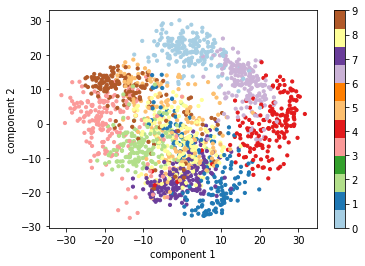

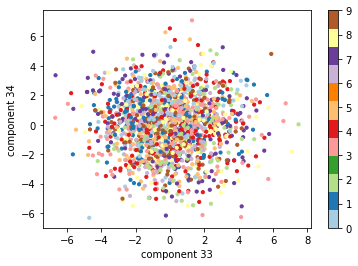

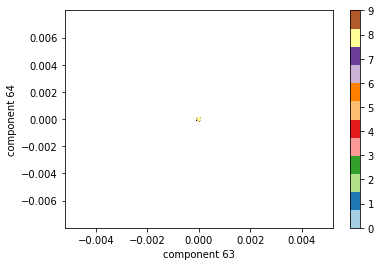

In [11]:
#
plt.figure()
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap="Paired", s=10)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

#
plt.figure() 
plt.scatter(proj[:, 32], proj[:, 33], c=digits.target, cmap="Paired", s=10)
plt.xlabel('component 33')
plt.ylabel('component 34')
plt.colorbar()

#
plt.figure() 
plt.scatter(proj[:, 62], proj[:, 63], c=digits.target, cmap="Paired", s=10)
plt.xlabel('component 63')
plt.ylabel('component 64')
plt.colorbar()


### For the PCA with constrained dimentions:

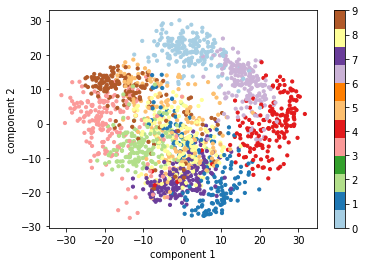

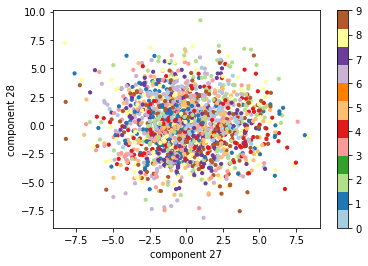

In [12]:

proj2 = pca2.fit_transform(digits.data)
plt.figure() 
plt.scatter(proj2[:, 0], proj[:, 1], c=digits.target, cmap="Paired", s=10)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

plt.figure() 
plt.scatter(proj2[:, 26], proj[:, 27], c=digits.target, cmap="Paired", s=10)
plt.xlabel('component 27')
plt.ylabel('component 28')
plt.colorbar()


[Article: In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)